# <center> Pytorch Tutorial </center> 

Credits go to [official pytorch tutorials](http://pytorch.org/tutorials/).

# 0. Preface on Pytorch

Pytorch is a more powerful python version of [Torch](http://torch.ch/). Torch is a Scientific Computing framework, not just a Deep Learning framework, but it is famous for Deep Learning application because of its handy Neural Network library (`torch.nn`) and its executing speed. A notable drawback of Torch is its language, Lua, which we are often not familiar with. We can see Pytorch in the way as a Torch framework written in python (and many more awesome features).

# 1. Torch Tensor as Numpy Array

In Torch and Pytorch Deep Learning regime, the main object is Tensors (multi-dimentional arrays). Pytorch wraps Tensors and the operations between them in the way that they work very similar to Numpy arrays (but can run both on CPUs and GPUs):

In [1]:
import torch
import numpy as np

In [2]:
x = np.array([-1, -2, 1, 2]) # a numpy array
print(x)
print(type(x))

[-1 -2  1  2]
<class 'numpy.ndarray'>


In [3]:
x = torch.Tensor(x) # now x is a torch Tensor
print(x)

tensor([-1., -2.,  1.,  2.])


In [4]:
y = torch.Tensor([0,1,2,-1]) # we can initialize some tensor directly from a python list
print(y)

tensor([ 0.,  1.,  2., -1.])


In [5]:
z = x + y # normal tensor operation, the result is a Tensor
print(z)
print(type(z))
print(z.type())

tensor([-1., -1.,  3.,  1.])
<class 'torch.Tensor'>
torch.FloatTensor


### In Pytorch, tensors are initialized in a weird way, you are the ones who have to initialize it properly:

In [6]:
x = torch.Tensor(5,4) 
print(x)
x = torch.zeros(5,4) # As default, a tensor in pytorch is a float tensor (torch.float32)
print(x)
x = torch.ones([5,4], dtype=torch.int64) 
print(x)
x = torch.Tensor([[5,4]]) # Initialize it from python list 
print(x)
print(x.shape)

tensor([[-14162.9453,      0.0000, -14162.9453,      0.0000],
        [  -154.9515,      0.0000,  -1339.8203,      0.0000],
        [     0.0000,         nan,      0.0000,      0.0000],
        [    -0.0000,      0.0000,      0.0000,      0.0000],
        [     0.0000,      0.0000,      0.0000,      0.0000]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])
tensor([[5., 4.]])
torch.Size([1, 2])


### You can access and slice Tensors like you do with numpy arrays

In [7]:
x = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
print(x)
print(x[:,2])
print(x[1:3,])

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([3., 6., 9.])
tensor([[4., 5., 6.],
        [7., 8., 9.]])


### Use `view()` to reshape Tensors:

In [8]:
x = torch.Tensor(3,4) 
print(x.shape)
x = x.view(2,6)
print(x)
print(x.shape)

torch.Size([3, 4])
tensor([[-14162.9141,      0.0000, -14162.9141,      0.0000,      0.0000,
              0.0000],
        [     0.0000,      0.0000,      0.0000,      0.0000,      0.0000,
              0.0000]])
torch.Size([2, 6])


# 2. Pytorch Variables


In [9]:
from torch.autograd import Variable
import torch.nn.functional as F

## Variable == Tensor (Pytorch 0.4 and later)
In previous versions of Pytorch prior to 0.4, Tensors works as Numpy arrays but both on GPUs and CPUs, and Pytorch variables contain their data (a Tensor) and other information (essentially, a Pytorch Variable is a node in the computational graph).

In [10]:
a = torch.Tensor([3])
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)
z = a * w
y = z + b
print(y.data) # data of a variable y is a tensor


tensor([9.])


### Variables not only contain data but also how it's formed

In [11]:
print(z.grad_fn)  
print(y.grad_fn)

### But from Pytorch 0.4, Tensor and Variable are merged. Tensors have the same properties and methods as Variable. So now you can use Tensor instead of Variable or you can still warp Tensor in a Variable as before.

In [12]:
torch.__version__

'0.4.1'

In [13]:
a = torch.Tensor([3]) # Normal tensor - multi array
print(a)
print(a.grad_fn)

w = torch.Tensor([2]) # A variable - A tensor which contains other information
w.requires_grad = True

b = torch.Tensor([3])
b.requires_grad = True
z = a * w
y = z + b
print(y)
print(y.data) # data of a variable y is a normal tensor

tensor([3.])
None
tensor([9.], grad_fn=<ThAddBackward>)
tensor([9.])


### Now we can do auto differentiation

In [14]:
y.backward() # y = a * w + b

In [15]:
print(b.grad)  
print(w.grad) # w and b are variables

tensor([1.])
tensor([3.])


In [16]:
print(z.grad)
print(a.grad) # z and a are normal tensors, no gradient information included

None
None


### Gradients of more complicated functions can be calculated easily: 

In [17]:
def mean_squared_error(t, y):  # Mean squared error in numpy
    # t: target label
    # y: predicted value
    n, m = y.shape
    return np.sum((y - t)**2) / (n * m)
    
def dMSE_dy(t, y): # Derivative of mean squared error w.r.t y in numpy
    n, m = y.shape
    return 2 * (y-t) / (n * m)

def mean_squared_error_PT(t, y): # Mean squared error - Pytorch version
    # t: target label
    # y: predicted value
    n, m = y.shape
    return torch.sum((y - t)**2) / (n * m)

y = np.random.randn(4,2)
t = np.random.randn(4,2)

# forward test
my_mse = mean_squared_error(t, y)

# warp y, t to be tensors/variable
tt = torch.Tensor(t)
yt = Variable(torch.Tensor(y),requires_grad=True)
pt_mse = mean_squared_error_PT(tt,yt)

print("My Mean of Squared Error: " + str(my_mse))
print("Pytorch Mean of Squared Error: " + str(pt_mse))

# backward test
print("===============================")
my_dmse_dy = dMSE_dy(t, y)

pt_mse.backward() # Pytorch will calculate it for us

print("My Derivatives: " + str(my_dmse_dy))
print("Pytorch Derivative: " + str(yt.grad))

My Mean of Squared Error: 0.965555521359
Pytorch Mean of Squared Error: tensor(0.9656, grad_fn=<DivBackward0>)
My Derivatives: [[-0.28325768 -0.11636305]
 [ 0.09598345  0.00208108]
 [-0.13488133 -0.06288795]
 [-0.47412889  0.36447121]]
Pytorch Derivative: tensor([[-0.2833, -0.1164],
        [ 0.0960,  0.0021],
        [-0.1349, -0.0629],
        [-0.4741,  0.3645]])


### With Pytorch, we can do backward from a scalar variable only (e.g. some loss)

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

z = np.random.randn(4,2)
z_prime = sigmoid_prime(z)

zt = torch.Tensor(z)
zt.requires_grad = True
pt_sigmoid = torch.sigmoid(zt)
print("Sigmoid Prime: " + str(z_prime))

pt_sigmoid.backward() # THIS WILL RAISE AN ERROR
print("Pytorch Sigmoid Prime: " + str(zt.grad))



Sigmoid Prime: [[ 0.24437018  0.24998556]
 [ 0.22977959  0.15719286]
 [ 0.24750727  0.2084922 ]
 [ 0.19146435  0.18284794]]


RuntimeError: grad can be implicitly created only for scalar outputs

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

z = np.random.randn(4,2)
z_prime = sigmoid_prime(z)

zt = torch.Tensor(z)
zt.requires_grad = True
pt_sigmoid = torch.sigmoid(zt)
print("Sigmoid Prime: " + str(z_prime))

# This works because L = sum(all sigmoid(zt_i)) 
# => dL/dzt_i = dL/dsigmoid * dsigmoid/dzt_i = dsigmoid/dzt_i 
# (dL/dsigmoid = 1)
pt_sigmoid.sum().backward() 
print("Pytorch Sigmoid Prime: " + str(zt.grad))



Sigmoid Prime: [[ 0.23129314  0.24295573]
 [ 0.1749459   0.23849607]
 [ 0.24982371  0.23542608]
 [ 0.21187894  0.24196065]]
Pytorch Sigmoid Prime: tensor([[0.2313, 0.2430],
        [0.1749, 0.2385],
        [0.2498, 0.2354],
        [0.2119, 0.2420]])


# 3. Pytorch modules

In [20]:
from torch import nn


In [21]:
x = Variable(torch.randn(2,5), requires_grad=True)
print (x)


tensor([[ 0.1482, -1.2756, -0.2852,  0.4313, -1.4436],
        [-0.6384, -0.7230, -0.0108, -1.1022,  0.1441]], requires_grad=True)


### Linear layer

In [22]:
lin = nn.Linear(5, 3) # a linear transformation

In [23]:
z = lin(x) # forward the data x to the linear transformation
print(z)

tensor([[ 0.0513, -0.8082, -0.1712],
        [ 0.0965, -0.3425,  0.2972]], grad_fn=<ThAddmmBackward>)


### Non-linearity

In [24]:
y = torch.sigmoid(z)
print(y.grad_fn)

In [25]:
y = torch.tanh(z)
t = y.sum()
t.backward()
print(x.grad) # dt/dx

tensor([[-0.2611, -0.4481,  0.5561, -0.0567,  0.3528],
        [-0.1638, -0.4053,  0.5753, -0.0717,  0.4512]])


# 4. Building a neural network

* Choose topology: How many layers, which activation functions
* Choose error/cost/loss function
* Choose updating/learning methods (sgd/rmsprop/adadelta/adam...)
* Then define the architecture using the "language" of Pytorch: Pytorch will build the computational graph for you.

### Topology

In [26]:
# Input x, output y
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# Build a linear layer
lin = nn.Linear(3, 2)
print ('w: ', lin.weight)
print ('b: ', lin.bias)


w:  Parameter containing:
tensor([[-0.0086,  0.5010,  0.5386],
        [-0.5180, -0.3909,  0.0957]], requires_grad=True)
b:  Parameter containing:
tensor([-0.3856,  0.0061], requires_grad=True)


### Choose Loss function

In [27]:
criterion = nn.MSELoss()

### Choose Learning method

In [28]:
optimizer = torch.optim.SGD(lin.parameters(), lr=0.01) # do updates on weights of the linear layer

# 5. Training a neural network

1. Forward pass to calculate the outputs of the network
2. Compute the loss
3. Do the backward pass to calculate the error terms
4. Update the weights based on the specified learning method (sgd/rmsprop/adadelta/adam...)

### 1. Forward pass:

In [29]:
z = lin(x)

### 2. Compute Loss:

In [30]:
loss = criterion(z, y)
print('loss: ', loss.data.item())

loss:  1.181358814239502


### 3. Backward pass (and calculate the derivatives of the loss w.r.t weights of the linear layer)

In [31]:
loss.backward()

print ('dL/dw: ', lin.weight.grad) 
print ('dL/db: ', lin.bias.grad)

dL/dw:  tensor([[ 0.1122, -0.0639,  1.1485],
        [-0.6379,  0.0277, -0.3455]])
dL/db:  tensor([ 1.0297, -0.1100])


### 4. Update weights of the linear layer using Learning method

In [32]:
# update weights one time
optimizer.step()

# Equal to:
# lin.weight.data.sub_(0.01 * lin.weight.grad.data)  (w = w - 0.01 * dloss/dw)
# lin.bias.data.sub_(0.01 * lin.bias.grad.data)  (bias = bias - 0.01 * dloss/dbias)

# Print out the loss after optimization.
z = lin(x)
loss = criterion(z, y)
print('loss after 1 step optimization: ', loss.data.item()) # The loss should be smalller than in the step 2 above
# Those weights should be changed
print ('w: ', lin.weight)
print ('b: ', lin.bias)

loss after 1 step optimization:  1.1522507667541504
w:  Parameter containing:
tensor([[-0.0097,  0.5017,  0.5271],
        [-0.5116, -0.3912,  0.0991]], requires_grad=True)
b:  Parameter containing:
tensor([-0.3959,  0.0072], requires_grad=True)


# 6. Custom Modules

Most of the time we want to create our neural architecture ourself from the basic blocks of pytorch. Two things we have to do: inherit `nn.Module` and override the `__init__()` and `forward()` methods (You also have to override `backward()` method if you create the architecture based on a new activation function which hasn't been implemented in pytorch before - this is out of the scope of this tutorial).

In [33]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

# Build a sigmoid layer
class MySigmoid(nn.Module): # inheriting from nn.Module!
    
    def __init__(self, input_size, output_size):
        # just inherit the init of the module
        super(MySigmoid, self).__init__()
        
        # Your lego building here
        # NOTE: The non-linearity sigmoid doesn't have any parameter so we do not put it here
        # the layer's parameters will be all parameters from learnable modules building the layer
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        # Pass the input through the linear layer,
        # then pass that through the sigmoid.
        return torch.sigmoid(self.linear(x))
    
torch.manual_seed(1234)

# Input x, output y, test on t
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))
t = Variable(torch.zeros(5, 3))
# WHAT WILL HAPPEN IF WE DO THE FOLLOWING??? TRY IT YOURSELF!!!
#x = Variable(torch.Tensor(5,3))
#y = Variable(torch.Tensor(5,2))
#t = Variable(torch.Tensor(5,3)) 

# Create the network comprise of only that sigmoid layer
model = MySigmoid(3,2)

# Define loss and learning method
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train many times
def train(x, y, epoch):
    # Forward pass is different from train to test (e.g. dropout, batch norm)
    # So it's a good habit if you explicitly speak out
    model.train()
    for i in range(epoch):
        # Pytorch accumulates gradients.  We need to clear them out before a new batch
        model.zero_grad()
        
        # Forward pass and calculate errors
        z = model(x) # This is a shortcut for calling model.forward(x)
        loss = criterion(z, y)  # This is a shortcut for calling criterion.forward(z, y)
        print('Epoch {}: Loss: {}'.format(i+1, loss.data.item()))
              
        # Do backward pass and update weights
        loss.backward()
        optimizer.step()

# Test
def test(t):
    # Say that we do testing
    model.eval()
    return model(t) # Do the forward pass on the new input

train(x, y, 50)

# Do the test:
print("==================")
print("Apply on new data:")
print(t.data)
print("Result:")
print(test(t).data)



Epoch 1: Loss: 0.6959120035171509
Epoch 2: Loss: 0.6953508257865906
Epoch 3: Loss: 0.694790780544281
Epoch 4: Loss: 0.6942321062088013
Epoch 5: Loss: 0.6936746835708618
Epoch 6: Loss: 0.6931184530258179
Epoch 7: Loss: 0.692563533782959
Epoch 8: Loss: 0.6920098662376404
Epoch 9: Loss: 0.6914574503898621
Epoch 10: Loss: 0.6909063458442688
Epoch 11: Loss: 0.6903564929962158
Epoch 12: Loss: 0.6898078918457031
Epoch 13: Loss: 0.6892605423927307
Epoch 14: Loss: 0.6887145042419434
Epoch 15: Loss: 0.6881697177886963
Epoch 16: Loss: 0.6876261830329895
Epoch 17: Loss: 0.687083899974823
Epoch 18: Loss: 0.6865429282188416
Epoch 19: Loss: 0.6860032677650452
Epoch 20: Loss: 0.6854648590087891
Epoch 21: Loss: 0.6849276423454285
Epoch 22: Loss: 0.6843917965888977
Epoch 23: Loss: 0.683857262134552
Epoch 24: Loss: 0.683323860168457
Epoch 25: Loss: 0.6827918291091919
Epoch 26: Loss: 0.682261049747467
Epoch 27: Loss: 0.6817315816879272
Epoch 28: Loss: 0.6812033653259277
Epoch 29: Loss: 0.6806764602661133


# 7. Using Datasets 

[torchvision](http://pytorch.org/docs/master/torchvision/datasets.html) package (not a default pytorch package) contains popular datasets and tools to work easier with datasets, especially computer vision ones. You have to install it with conda or pip separately. Here is the example to load MNIST data and feed to a network.

In [34]:
from torchvision import datasets, transforms

# Download MNIST traing data to directory ../Data for the first time
# Read the training dataset from directory ../Data if there was such data
# Convert data to Tensor and do normalization (mean, std)
# transforms.Compose: compose of many image transformations
mnist = datasets.MNIST(root='../Data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1,), (0.4,))])
                      )

# Examine data: select one data pair (the first data instance)
image, label = mnist[0]
print (image.size())
print (label)

# Use DataLoader to easily divide a dataset into train/valid/test with mini-batches and shuffle...
train_loader = torch.utils.data.DataLoader(mnist, batch_size=32, shuffle=True)

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass

torch.Size([1, 28, 28])
tensor(5)


# 8. Custom Dataset

To work with provided datasets of the Praktikum projects, you should know how to preprocess data. The best way is to make a custom dataset and utilize DataLoader for your code. Here is the example to create a MNIST Dataset from a csv file exactly to what we have for the Neuronale Netze course. Similar to custom module, we have to inherit `Dataset` object and override `__len__()` and `__getitem__()` methods.

In [35]:
import torch
import numpy as np
from torch.utils.data import Dataset

class MyMNIST(Dataset):
    """My custom MNIST dataset."""
    
    TRAIN = 0
    VALID = 1
    TEST = 2

    def __init__(self, csv_file, data=TRAIN, one_hot=False, transforms=None):
        """
        Args:
            csv_file (string): Path to the csv file
            root_dir (string): Directory with all the images.
            one_hot (boolean): Do the one-hot encoding on the labels or not
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        
        # load from csv_file (full path)
        all_data = np.genfromtxt(csv_file, delimiter=",", dtype="uint8")
    
        # There are 5000 instances (5000 lines in csv file)
        # First 3000 lines will be training set
        # The next 1000 lines will be validation set
        # The last 1000 lines will be the test set
        # You can modify this
        train, test = all_data[:4000], all_data[4000:]
        train, valid = train[:3000], train[3000:]
        
        # We can implement the shuffle easily as follows, 
        # but we would like to use this utility from DataLoader
        # from numpy.random import shuffle
        # shuffle(train)
        # ...
        
 
        # The label of the digits is always the first fields
        if data == self.TRAIN:
            self.input = train[:, 1:]
            self.label = train[:, 0]
        elif data == self.VALID:
            self.input = valid[:, 1:]
            self.label = valid[:, 0]
        else:
            self.input = test[:, 1:]
            self.label = test[:, 0]
    
        
        # One-hot encoding:
        if one_hot:
            self.label = np.array(map(one_hot_encoding, self.label))
           
        # Apply the transformations:
        for i, transfunction in enumerate(transforms):
            self = transfunction(self)
        
    def __len__(self):
        return len(self.input)

    def __getitem__(self, idx):
        return self.input[idx], self.label[idx]


# One-hot encoding
def one_hot_encoding(idx):
    one_hot_array = np.zeros(10)
    one_hot_array[idx] = 1
    return one_hot_array

####################################################
# We can also implement the transformation ourselves

# This normalizer only works for our MNIST data: divide the pixel values to 255
# We can implement other general normalizers, e.g. standard normalizer, by:
# mean = np.mean(data.input)
# std = np.std(data.input)
# data.input = (data.input - mean)/std

class Normalizer(object):

    def __call__(self, data):
        data.input = 1.0*data.input/255
        return data

# This convert from numpy arrays of data to pytorch tensors
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, data):
        data.input = torch.from_numpy(data.input).float()
        data.label = torch.from_numpy(data.label).long()
        return data

Now we can do similar things as the `torchvision.datasets.MNIST`:


Label: tensor(5)


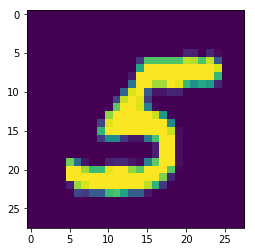

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

# Some helper function to draw the image
def plot(img):
    plt.imshow(img.view(28,28).numpy())
    
    
my_mnist = MyMNIST(csv_file='../Data/mnist_seven.csv',
                data=MyMNIST.TEST,
                one_hot=False,
                transforms=[Normalizer(),
                            ToTensor()])


# Examine data: select one data pair
image, label = my_mnist[3]
plot(image)
print("Label: " + str(label))

train_loader = torch.utils.data.DataLoader(my_mnist, batch_size=32, shuffle=True)

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass


# 9. Complete example on MNIST (CPU version)

Now we can do a complete Feedforward Network to recognize handwritten digits trained and test on MNIST data

In [37]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset

# Define custom network: 3 layers
class MyFNN(nn.Module):
    
    def __init__(self, input_size, hidden_sizes, output_size, dropout=0.3):
        super(MyFNN, self).__init__()
        
        self.model = nn.Sequential()  # Container of modules
        
        # Dynamically build network
        for i, hidden_size in enumerate(hidden_sizes):
            self.model.add_module("linear" + str(i+1), nn.Linear(input_size, hidden_size))
            self.model.add_module("sigmoid" + str(i+1), nn.Sigmoid())
            self.model.add_module("dropout" + str(i+1), nn.Dropout(dropout))
            input_size = hidden_size
        
        self.model.add_module("linear" + str(len(hidden_sizes)+1), nn.Linear(input_size, output_size, bias=False))
        # If you use CrossEntropyLoss instead of NLLLoss, do not need to add this LogSoftmax layer
        # self.model.add_module("logsoftmax", nn.LogSoftmax())  
    
    def forward(self, x):
        return self.model.forward(x)

    
batch_size = 64
torch.manual_seed(1234)

# Two-hidden-layer Feedforward Network with default dropout
net = MyFNN(784, [100, 50], 10)


#criterion = nn.NLLLoss()  # Use Negative Log Likelihood
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def train(epoch, train_data):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
    for i in range(epoch):
        num_batch = len(train_data)//batch_size + 1
        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28)
            
            #Zero grads before each optimizing step
            optimizer.zero_grad()
            
            # Forward pass and calculate errors
            y = net(images)
            loss = criterion(y, labels)
            if (batch_idx+1) % 100 == 0:
                print('Iteration {0:d}/{1:d}: Loss: {2:.2f}'.format(batch_idx+1, num_batch, loss.data.item()))
            # Do backward pass and update weights
            loss.backward()
            optimizer.step()
        print('Epoch {}: Loss: {}'.format(i+1, loss.data.item()))


# Train
from torchvision import datasets, transforms
train_data = datasets.MNIST(root='../Data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
net.train()    
train(5, train_data)


# Test
test_data = datasets.MNIST(root='../Data', 
                            train=False, 
                            transform=transforms.ToTensor(),  
                            download=True)

net.eval()

correct = 0
total = 0 # accumulated loss over mini-batches
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

for images, labels in test_loader:
    images = images.view(-1, 28*28)
    y = net(images)
    _, predicts = torch.max(y.data, 1)
    total += labels.size(0)
    correct += (predicts == labels).sum()
   
print('Accuracy on the test images: %d %%' % (100 * correct / total))
    

Iteration 100/938: Loss: 1.97
Iteration 200/938: Loss: 1.41
Iteration 300/938: Loss: 0.93
Iteration 400/938: Loss: 0.66
Iteration 500/938: Loss: 0.85
Iteration 600/938: Loss: 0.46
Iteration 700/938: Loss: 0.72
Iteration 800/938: Loss: 0.56
Iteration 900/938: Loss: 0.48
Epoch 1: Loss: 0.44727399945259094
Iteration 100/938: Loss: 0.42
Iteration 200/938: Loss: 0.38
Iteration 300/938: Loss: 0.36
Iteration 400/938: Loss: 0.35
Iteration 500/938: Loss: 0.39
Iteration 600/938: Loss: 0.34
Iteration 700/938: Loss: 0.35
Iteration 800/938: Loss: 0.40
Iteration 900/938: Loss: 0.39
Epoch 2: Loss: 0.21507880091667175
Iteration 100/938: Loss: 0.36
Iteration 200/938: Loss: 0.46
Iteration 300/938: Loss: 0.33
Iteration 400/938: Loss: 0.40
Iteration 500/938: Loss: 0.21
Iteration 600/938: Loss: 0.57
Iteration 700/938: Loss: 0.27
Iteration 800/938: Loss: 0.42
Iteration 900/938: Loss: 0.12
Epoch 3: Loss: 0.30314961075782776
Iteration 100/938: Loss: 0.46
Iteration 200/938: Loss: 0.21
Iteration 300/938: Loss: 

# 10. Example on our custom MNIST data


In [38]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset

# Define custom network: 3 layerstorch.max
class MyFNN(nn.Module):
    
    def __init__(self, input_size, hidden_sizes, output_size, dropout=0.3):
        super(MyFNN, self).__init__()
        
        self.model = nn.Sequential()  # Container of modules
        
        # Dynamically build network
        for i, hidden_size in enumerate(hidden_sizes):
            self.model.add_module("linear" + str(i+1), nn.Linear(input_size, hidden_size))
            self.model.add_module("sigmoid" + str(i+1), nn.Sigmoid())
            self.model.add_module("dropout" + str(i+1), nn.Dropout(dropout))
            input_size = hidden_size
        
        self.model.add_module("linear" + str(len(hidden_sizes)+1), nn.Linear(input_size, output_size, bias=False))
        # If you use CrossEntropyLoss instead of NLLLoss, do not need to add this LogSoftmax layer
        # self.model.add_module("logsoftmax", nn.LogSoftmax())  
    
    def forward(self, x):
        return self.model.forward(x)


batch_size = 64
torch.manual_seed(1234)
    
# Two-hidden-layer Feedforward Network with default dropout
net = MyFNN(784, [100, 50], 10)


#criterion = nn.NLLLoss()  # Use Negative Log Likelihood
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def train(epoch, train_data):
    train_loader = torch.utils.data.DataLoader(my_mnist, batch_size=batch_size, shuffle=True)
    
    for i in range(epoch):
        num_batch = len(train_data)//batch_size + 1
        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28)
            
            #Zero grads before each optimizing step
            optimizer.zero_grad()
            
            # Forward pass and calculate errors
            y = net(images)
            loss = criterion(y, labels)
            if (batch_idx+1) % 100 == 0:
                print('Iteration {0:d}/{1:d}: Loss: {2:.2f}'.format(batch_idx+1, num_batch, loss.data.item()))
            # Do backward pass and update weights
            loss.backward()
            optimizer.step()
        print('Epoch {}: Loss: {}'.format(i+1, loss.data.item()))


# Train
from torchvision import transforms
train_data = MyMNIST(csv_file='../Data/mnist_seven.csv',
                    data=MyMNIST.TRAIN,
                    one_hot=False,
                    transforms=[Normalizer(),
                                ToTensor()])


net.train()    
train(35, train_data)


# Test
test_data = MyMNIST(csv_file='../Data/mnist_seven.csv',
                    data=MyMNIST.TEST,
                    one_hot=False,
                    transforms=[Normalizer(),
                                ToTensor()])

net.eval()

correct = 0
total = 0 # accumulated loss over mini-batches
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

for images, labels in test_loader:
    images = images.view(-1, 28*28)
    y = net(images)
    _, predicts = torch.max(y.data, 1)
    total += labels.size(0)
    correct += (predicts == labels).sum()
   
print('Accuracy on the test images: %d %%' % (100 * correct / total))
    

Epoch 1: Loss: 2.328505039215088
Epoch 2: Loss: 2.2135486602783203
Epoch 3: Loss: 2.198232650756836
Epoch 4: Loss: 2.107914686203003
Epoch 5: Loss: 2.1009528636932373
Epoch 6: Loss: 1.8800849914550781
Epoch 7: Loss: 1.794089913368225
Epoch 8: Loss: 1.661250114440918
Epoch 9: Loss: 1.52210533618927
Epoch 10: Loss: 1.5143582820892334
Epoch 11: Loss: 1.3810864686965942
Epoch 12: Loss: 1.328049898147583
Epoch 13: Loss: 1.195167899131775
Epoch 14: Loss: 1.2042210102081299
Epoch 15: Loss: 1.2199808359146118
Epoch 16: Loss: 0.9485584497451782
Epoch 17: Loss: 0.9740575551986694
Epoch 18: Loss: 0.9747207760810852
Epoch 19: Loss: 0.9090003967285156
Epoch 20: Loss: 0.9006780385971069
Epoch 21: Loss: 0.7593070864677429
Epoch 22: Loss: 0.8389652967453003
Epoch 23: Loss: 0.6704359650611877
Epoch 24: Loss: 0.6427893042564392
Epoch 25: Loss: 0.5813964605331421
Epoch 26: Loss: 0.6004900932312012
Epoch 27: Loss: 0.6656450033187866
Epoch 28: Loss: 0.6000130772590637
Epoch 29: Loss: 0.5313893556594849
Epo

# 11. Use GPUs
Tensors stored in CPUs are different to tensors stored in GPUs. Depending on the device (currently Pytorch supports only CPUs and CUDA-enable GPUs) that tensors are stored and preprocessed differently, but in general, Pytorch wraps other operations to be transparent to the device as much as possible.  
The following cell can be run only when you run it on a GPU-enabled device. 

In [ ]:
cuda = torch.device('cuda')     # Default CUDA-enable GPU device
cuda1 = torch.device('cuda:1')  # The second available GPU device (0-indexed)

a = torch.tensor([1., 2.], device=cuda)
print(a)

b = torch.tensor([1., 2.])
print(b)

b1 = b.cuda() # Convert CPU tensor to GPU tensor (and store it on the default)
print(b1)

# Convert tensor in one device to another device
b2 = b.to(device=cuda)
print(b2)

# The following command will raise an error since a is a GPU tensor and b is a CPU tensor
#c1 = a + b
#print(c1)

# Convert tensor in one device to another device
c1 = a.to(device=torch.device('cpu')) + b
print(c1)


## GPU run on our custom data
To run on GPUs, normally we need to convert the data (training, testing) and the model (architecture) only

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset

# Define custom network: 3 layerstorch.max
class MyFNN(nn.Module):
    
    def __init__(self, input_size, hidden_sizes, output_size, dropout=0.3):
        super(MyFNN, self).__init__()
        
        self.model = nn.Sequential()  # Container of modules
        
        # Dynamically build network
        for i, hidden_size in enumerate(hidden_sizes):
            self.model.add_module("linear" + str(i+1), nn.Linear(input_size, hidden_size))
            self.model.add_module("sigmoid" + str(i+1), nn.Sigmoid())
            self.model.add_module("dropout" + str(i+1), nn.Dropout(dropout))
            input_size = hidden_size
        
        self.model.add_module("linear" + str(len(hidden_sizes)+1), nn.Linear(input_size, output_size, bias=False))
        # If you use CrossEntropyLoss instead of NLLLoss, do not need to add this LogSoftmax layer
        # self.model.add_module("logsoftmax", nn.LogSoftmax())  
    
    def forward(self, x):
        return self.model.forward(x)

batch_size = 64
torch.manual_seed(1234)

# Two-hidden-layer Feedforward Network with default dropout
net = MyFNN(784, [100, 50], 10).cuda()


#criterion = nn.NLLLoss()  # Use Negative Log Likelihood
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def train(epoch, train_data):
    train_loader = torch.utils.data.DataLoader(my_mnist, batch_size=batch_size, shuffle=True)
    
    for i in range(epoch):
        num_batch = len(train_data)//batch_size + 1
        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28).cuda()
            labels = labels.cuda()
            
            #Zero grads before each optimizing step
            optimizer.zero_grad()
            
            # Forward pass and calculate errors
            y = net(images)
            loss = criterion(y, labels)
            if (batch_idx+1) % 100 == 0:
                print('Iteration {0:d}/{1:d}: Loss: {2:.2f}'.format(batch_idx+1, num_batch, loss.data.item()))
            # Do backward pass and update weights
            loss.backward()
            optimizer.step()
        print('Epoch {}: Loss: {}'.format(i+1, loss.data.item()))


# Train
from torchvision import transforms
train_data = MyMNIST(csv_file='../Data/mnist_seven.csv',
                    data=MyMNIST.TRAIN,
                    one_hot=False,
                    transforms=[Normalizer(),
                                ToTensor()])


net.train()    
train(35, train_data)


# Test
test_data = MyMNIST(csv_file='../Data/mnist_seven.csv',
                    data=MyMNIST.TEST,
                    one_hot=False,
                    transforms=[Normalizer(),
                                ToTensor()])

net.eval()

correct = 0
total = 0 # accumulated loss over mini-batches
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

for images, labels in test_loader:
    images = images.view(-1, 28*28).cuda()
    labels = labels.cuda()
    y = net(images)
    _, predicts = torch.max(y.data, 1)
    total += labels.size(0)
    correct += (predicts == labels).sum()
   
print('Accuracy on the test images: %d %%' % (100 * correct / total))
    

## Device-independent run

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# 12. Complete example of MNIST (run on available devices)

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset

# Define custom network: 3 layerstorch.max
class MyFNN(nn.Module):
    
    def __init__(self, input_size, hidden_sizes, output_size, dropout=0.3):
        super(MyFNN, self).__init__()
        
        self.model = nn.Sequential()  # Container of modules
        
        # Dynamically build network
        for i, hidden_size in enumerate(hidden_sizes):
            self.model.add_module("linear" + str(i+1), nn.Linear(input_size, hidden_size))
            self.model.add_module("sigmoid" + str(i+1), nn.Sigmoid())
            self.model.add_module("dropout" + str(i+1), nn.Dropout(dropout))
            input_size = hidden_size
        
        self.model.add_module("linear" + str(len(hidden_sizes)+1), nn.Linear(input_size, output_size, bias=False))
        # If you use CrossEntropyLoss instead of NLLLoss, do not need to add this LogSoftmax layer
        # self.model.add_module("logsoftmax", nn.LogSoftmax())  
    
    def forward(self, x):
        return self.model.forward(x)

# Get the available device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 64
torch.manual_seed(1234)

# Two-hidden-layer Feedforward Network with default dropout
net = MyFNN(784, [100, 50], 10).to(device)


#criterion = nn.NLLLoss()  # Use Negative Log Likelihood
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


def train(epoch, train_data):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
    for i in range(epoch):
        num_batch = len(train_data)//batch_size + 1
        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            
            #Zero grads before each optimizing step
            optimizer.zero_grad()
            
            # Forward pass and calculate errors
            y = net(images)
            loss = criterion(y, labels)
            if (batch_idx+1) % 100 == 0:
                print('Iteration {0:d}/{1:d}: Loss: {2:.2f}'.format(batch_idx+1, num_batch, loss.data.item()))
            # Do backward pass and update weights
            loss.backward()
            optimizer.step()
        print('Epoch {}: Loss: {}'.format(i+1, loss.data.item()))


# Train
from torchvision import datasets, transforms
train_data = datasets.MNIST(root='../Data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
net.train()    
train(5, train_data)


# Test
test_data = datasets.MNIST(root='../Data', 
                            train=False, 
                            transform=transforms.ToTensor(),  
                            download=True)

net.eval()

correct = 0
total = 0 # accumulated loss over mini-batches
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

for images, labels in test_loader:
    images = images.view(-1, 28*28).to(device)
    labels = labels.to(device)
    y = net(images)
    _, predicts = torch.max(y.data, 1)
    total += labels.size(0)
    correct += (predicts == labels).sum()
   
print('Accuracy on the test images: %d %%' % (100 * correct / total))
    